In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale =2)
sns.set_style("whitegrid")
from sklearn.preprocessing import StandardScaler
from datetime import datetime

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [78]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [79]:
import warnings
warnings.filterwarnings('ignore')

In [80]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
     #plt.figure(figsize=(18,10))
    
    #plt.subplot(121)
     #sns.scatterplot(x=train_pred_values, y=train_true_values)
     #plt.xlabel('Predicted values')
     #plt.ylabel('True values')
     #plt.title('Train sample prediction')
    
     #plt.subplot(122)
     #sns.scatterplot(x=test_pred_values, y=test_true_values)
     #plt.xlabel('Predicted values')
     #plt.ylabel('True values')
     #plt.title('Test sample prediction')

     #plt.show()

In [81]:
#TRAIN_DATASET_PATH = '/kaggle/input/real-estate-price-prediction-moscow/train.csv'
#TEST_DATASET_PATH = '/kaggle/input/real-estate-price-prediction-moscow/test.csv'

In [82]:
TRAIN_DATASET_PATH = './train.csv'
TEST_DATASET_PATH = './test.csv'

# Описание данных

Data fields
Id - идентификационный номер квартиры
DistrictId - идентификационный номер района
Rooms - количество комнат
Square - площадь
LifeSquare - жилая площадь
KitchenSquare - площадь кухни
Floor - этаж
HouseFloor - количество этажей в доме
HouseYear - год постройки дома
Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
Social_1, Social_2, Social_3 - социальные показатели местности
Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
Price - цена квартиры

In [83]:
df = pd.read_csv(TRAIN_DATASET_PATH, sep=',')
df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,B,B,35,5776,1,2078.0,2,4,B,161044.944138
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,B,B,24,4860,1,80.0,0,3,B,142402.739272
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,B,B,37,7687,11,176.0,5,5,B,326174.175191
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
9,8094,6,3.0,79.867477,75.085125,1.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,194756.023945


In [84]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [85]:
df.keys()

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

# Заполнение пропусков в данных, обработка признаков:

Исключаем признаки id

In [86]:
#df= df[df.columns[2:]]

df['Id'] = df['Id'].astype(str)
df['DistrictId'] = df['DistrictId'].astype(str)

В данных есть не заполненные значения - NAN, посмотрим, для каких признаков они присутствуют 


In [87]:
df.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

Посмотрим на распределение жилой площади, чтобы понять, чем заменить пропуски. При этом график строю, прологарифмировав значения, иначе из за наличия выбросов по площади график выглядит неинформативным

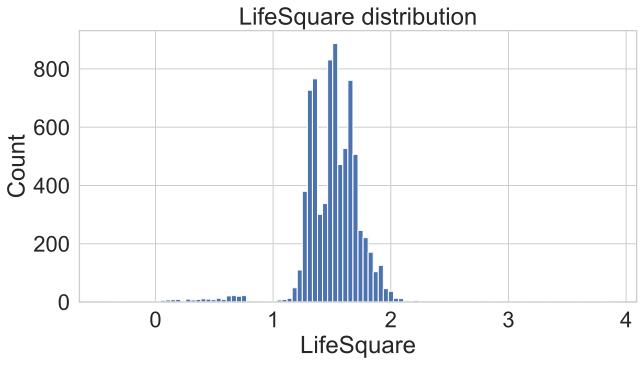

In [88]:
plt.figure(figsize = (10, 5))

np.log10(df['LifeSquare']).hist(bins=100)
plt.ylabel('Count')
plt.xlabel('LifeSquare')

plt.title('LifeSquare distribution')
plt.show()

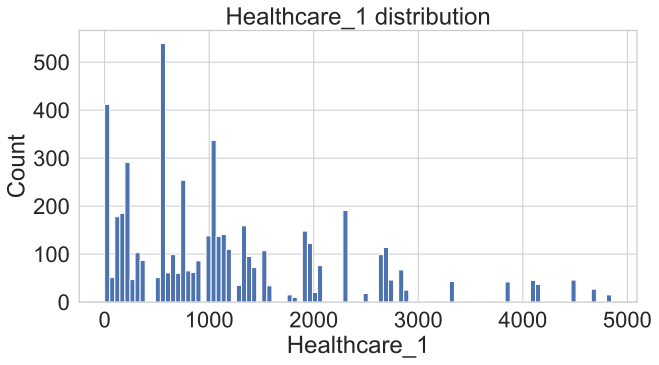

In [89]:
plt.figure(figsize = (10, 5))

df['Healthcare_1'].hist(bins=100)
plt.ylabel('Count')
plt.xlabel('Healthcare_1')

plt.title('Healthcare_1 distribution')
plt.show()

По графику распределения жилой площади видно, что есть выборосы, которые искажают среднее, поэтому заменяю на медиану. По графику распределения здоровья видно, что заменить лучше на среднее.

In [90]:
median = df['LifeSquare'].sort_values().median()
#median1 = df['Healthcare_1'].sort_values().median()
mean = df['Healthcare_1'].mean()

In [91]:
mean

1142.9044598231449

In [92]:
#median1

In [93]:
median

32.78126019215573

In [94]:
df['LifeSquare'] = df['LifeSquare'].fillna(median)

In [95]:
df['Healthcare_1'] = df['Healthcare_1'].fillna(mean)

In [96]:
df.isna().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

# Категориальные переменные:

In [97]:
df_obj_features = df.select_dtypes(include='object')

In [98]:
df_obj_features.head()

,Id,DistrictId,Ecology_2,Ecology_3,Shops_2
0,11809,27,B,B,B
1,3013,22,B,B,B
2,8215,1,B,B,B
3,2352,1,B,B,B
4,13866,94,B,B,B


In [99]:
pd.get_dummies(df['Ecology_2'], prefix='Ecology_2',prefix_sep='_')

,Ecology_2_A,Ecology_2_B
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
9995,0,1
9996,0,1
9997,0,1
9998,0,1


In [100]:
df = pd.concat([df, pd.get_dummies(df['Ecology_2'], prefix='Ecology_2',prefix_sep='_')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Ecology_3'], prefix='Ecology_3',prefix_sep='_')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Shops_2'], prefix='Shops_2',prefix_sep='_')], axis=1)
df = df.drop(columns=['Ecology_2', 'Ecology_3', 'Shops_2'])
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,11809,27,3.0,115.027311,32.781260,10.0,4,10.0,2014,0.075424,...,1142.90446,0,0,305018.871089,0,1,0,1,0,1
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,1183.00000,1,0,177734.553407,0,1,0,1,0,1
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,240.00000,3,1,282078.720850,0,1,0,1,0,1
3,2352,1,1.0,40.409907,32.781260,1.0,10,22.0,1977,0.007122,...,1142.90446,0,1,168106.007630,0,1,0,1,0,1
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,1142.90446,0,6,343995.102962,0,1,0,1,0,1


In [101]:
df.dtypes

Id                object
DistrictId        object
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Price            float64
Ecology_2_A        uint8
Ecology_2_B        uint8
Ecology_3_A        uint8
Ecology_3_B        uint8
Shops_2_A          uint8
Shops_2_B          uint8
dtype: object

# Обработка выбросов

Пройдемся по каждому признаку, посмотрим как часто встречаются значения и решим, как обработать выбросы индивидуально.

In [102]:
df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

Видно, что 10, 6 и 19 это явные выбросы. Заменим эти значения на моду. Там где количество комнат 0 - будет считать, что это 1

In [103]:
df.loc[df['Rooms'] == 0, 'Rooms'] = 1
df.loc[df['Rooms'] >= 6, 'Rooms'] = df['Rooms'].mode()

Рассчитаем пороговые значения для площади, за пределами которых я предполагаю, что это выбросы, заменим их на медиану

In [104]:
extreme_max = np.percentile(df['Square'].sort_values(), 75)+1.5*(np.percentile(df['Square'].sort_values(), 75)-np.percentile(df['Square'].sort_values(), 25))
extreme_min = np.percentile(df['Square'].sort_values(), 25)-1.5*(np.percentile(df['Square'].sort_values(), 75)-np.percentile(df['Square'].sort_values(), 25))

In [105]:
extreme_max

102.08924188493728

In [106]:
extreme_min

5.586264180189367

In [107]:
#вспомогательный график, строю, чтобы смотреть распределение признаков дополнительно к анализу по превышению межквартильного размаха
#plt.subplot()
#sns.scatterplot(x = df['Social_2'], y =df['Price'] )
#plt.show()

Значения площади (Square) больше 200 заменим на медиану

In [108]:
median = df['Square'].sort_values().median()
mean = df['Square'].mean()
median

52.51330992401352

In [109]:
mean

56.315775197935615

In [110]:
df.loc[df['Square'] > extreme_max, 'Square'] = df['Square'].median()
df.loc[df['Square'] < extreme_min, 'Square'] = df['Square'].median()

Аналогично ищу выбросы для признака LifeSquare

In [111]:
extreme_max = np.percentile(df['LifeSquare'].sort_values(), 75)+1.5*(np.percentile(df['LifeSquare'].sort_values(), 75)-np.percentile(df['LifeSquare'].sort_values(), 25))
extreme_min = np.percentile(df['LifeSquare'].sort_values(), 25)-1.5*(np.percentile(df['LifeSquare'].sort_values(), 75)-np.percentile(df['LifeSquare'].sort_values(), 25))

In [112]:
median = df['LifeSquare'].sort_values().median()
median

32.78126019215573

In [113]:
df.loc[df['LifeSquare'] > extreme_max, 'LifeSquare'] = df['LifeSquare'].median()
df.loc[df['LifeSquare'] < extreme_min, 'LifeSquare'] = df['LifeSquare'].median()

Аналогично ищу выбросы для признака KitchenSquare

In [114]:
extreme_max = np.percentile(df['KitchenSquare'].sort_values(), 75)+1.5*(np.percentile(df['KitchenSquare'].sort_values(), 75)-np.percentile(df['KitchenSquare'].sort_values(), 25))
extreme_min = np.percentile(df['KitchenSquare'].sort_values(), 25)-1.5*(np.percentile(df['KitchenSquare'].sort_values(), 75)-np.percentile(df['KitchenSquare'].sort_values(), 25))

In [115]:
df.loc[df['KitchenSquare'] > extreme_max, 'KitchenSquare'] = df['KitchenSquare'].median()
df.loc[df['KitchenSquare'] < extreme_min, 'KitchenSquare'] = df['KitchenSquare'].median()

Ищу выбросы для признака Floor

In [116]:
df['Floor'].value_counts().sort_index()

1     235
2     588
3     872
4     949
5     876
6     802
7     759
8     643
9     604
10    553
11    457
12    438
13    398
14    362
15    287
16    290
17    256
18    185
19    121
20     68
21     59
22     54
23     25
24     53
25     34
26     18
27      5
28      3
31      1
32      2
33      1
37      1
42      1
Name: Floor, dtype: int64

Заменим все данные, где более 32 этажей на моду

In [117]:
df.loc[df['Floor'] > 32, 'Floor'] = df['Floor'].mode()

Ищу выбросы для признака HouseFloor

In [118]:
df['HouseFloor'].value_counts().sort_index()

0.0       269
1.0       497
2.0        48
3.0       127
4.0       134
5.0      1031
6.0        58
7.0        59
8.0       141
9.0      1389
10.0      135
11.0       28
12.0     1074
13.0       27
14.0      625
15.0      123
16.0      576
17.0     2331
18.0       89
19.0      108
20.0      105
21.0       33
22.0      343
23.0       40
24.0      176
25.0      374
26.0        1
27.0        6
28.0        3
29.0        1
30.0       21
31.0        1
32.0        4
36.0        1
37.0        4
38.0        1
39.0        2
40.0        7
44.0        1
45.0        1
47.0        1
48.0        2
99.0        2
117.0       1
Name: HouseFloor, dtype: int64

удаляю также количество этажей более 32 

In [119]:
df.loc[df['HouseFloor'] > 32, 'HouseFloor'] = df['HouseFloor'].mode()

Ищу выбросы для признака HouseYear

In [120]:
df['HouseYear'].value_counts().sort_index()

1910          1
1912          2
1914          1
1916          1
1917          3
           ... 
2018        175
2019         79
2020         19
4968          1
20052011      1
Name: HouseYear, Length: 97, dtype: int64

In [121]:
df.loc[df['HouseYear'] > 2020, 'HouseYear'] = 2020

Ищу выбросы для признака Ecology_1

In [122]:
extreme_max = np.percentile(df['Ecology_1'].sort_values(), 75)+1.5*(np.percentile(df['Ecology_1'].sort_values(), 75)-np.percentile(df['Ecology_1'].sort_values(), 25))
extreme_min = np.percentile(df['Ecology_1'].sort_values(), 25)-1.5*(np.percentile(df['Ecology_1'].sort_values(), 75)-np.percentile(df['Ecology_1'].sort_values(), 25))

In [123]:
df.loc[df['Ecology_1'] > extreme_max, 'Ecology_1'] = df['Ecology_1'].median()
df.loc[df['Ecology_1'] < extreme_min, 'Ecology_1'] = df['Ecology_1'].median()

Ищу выбросы для признака Social_1

In [124]:
df['Social_1'].value_counts().sort_values()

3       9
7      15
12     18
13     22
10     24
14     46
20     50
15     51
8      62
38     64
29     70
50     79
41     83
32     87
18     92
49     95
17     96
66     99
19    118
16    123
26    127
42    129
11    138
4     141
28    144
27    151
39    159
74    176
47    177
35    200
0     201
52    201
24    205
37    205
21    207
36    209
9     213
43    238
31    243
46    245
33    252
34    311
53    355
22    367
6     377
23    434
30    465
5     528
25    557
1     654
2     688
Name: Social_1, dtype: int64

пока будем считать что по данному признаку выбросов нет

Ищу выбросы для признака Social_2

In [125]:
df['Social_2'].value_counts().sort_values()

528       1
507       1
662       2
1423      3
568       3
       ... 
6398    245
1437    346
629     486
1564    511
264     587
Name: Social_2, Length: 142, dtype: int64

пока будем считать что по данному признаку выбросов нет

Ищу выбросы для признака Social_3. пока будем считать что по данному признаку выбросов нет

In [126]:
df['Social_3'].value_counts().sort_values()

37        3
45        9
73       10
39       15
23       18
20       19
19       22
93       25
59       25
87       27
24       37
84       43
56       49
48       58
27       59
14       97
16      101
10      142
8       170
11      172
7       184
9       192
141     245
5       391
6       423
2       635
4       835
3      1136
1      1861
0      2997
Name: Social_3, dtype: int64

Ищу выбросы для признака Helthcare_2. пока будем считать что по данному признаку выбросов нет

In [127]:
df['Helthcare_2'].value_counts().sort_values()

6      99
4     288
5     388
2    1158
3    1670
1    2183
0    4214
Name: Helthcare_2, dtype: int64

Ищу выбросы для признака Shops_1. пока будем считать что по данному признаку выбросов нет

In [128]:
df['Shops_1'].value_counts().sort_values()

19      49
16      83
15     176
10     215
23     245
8      253
7      294
9      316
11     401
6      487
3      711
4      841
2      964
5     1324
1     1325
0     2316
Name: Shops_1, dtype: int64

# Сохранение в функции

In [129]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians=None
        self.modes =None
        self.means =None
        self.square_quantile25 = None
        self.kitchensquare_quantile25 = None
        self.lifesquare_quantile25 = None
        self.eco_quantile25 = None
        self.square_quantile75 = None
        self.kitchensquare_quantile75 = None
        self.lifesquare_quantile75 = None
        self.eco_quantile75 = None  
        
        
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = X.median()
        # Расчет мод
        self.modes = X.mode()
         # Расчет средних
        self.means =X.mean()
        # Расчет квантилей 25
        self.square_quantile25 = X['Square'].quantile(.25)
        self.kitchensquare_quantile25 = X['KitchenSquare'].quantile(.25)
        self.lifesquare_quantile25 = X['LifeSquare'].quantile(.25)
        self.eco_quantile25 = X['Ecology_1'].quantile(.25)
        # Расчет квантилей 75
        self.square_quantile75 = X['Square'].quantile(.25)
        self.kitchensquare_quantile75 = X['KitchenSquare'].quantile(.75)
        self.lifesquare_quantile75 = X['LifeSquare'].quantile(.75)
        self.eco_quantile75 = X['Ecology_1'].quantile(.75)
        
            
    def transform(self, X):
        """Трансформация данных"""

        # Rooms
         
        X['Rooms_outlier'] = 0
        X.loc[(X['Rooms'] == 0) | (X['Rooms'] >= 6), 'Rooms_outlier'] = 1

        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] >= 6, 'Rooms'] = self.modes['Rooms']

               
        # KitchenSquare
        
        extreme_kit_max = self.kitchensquare_quantile75+1.5*(self.kitchensquare_quantile75-self.kitchensquare_quantile25)
        extreme_kit_min = self.kitchensquare_quantile25-1.5*(self.kitchensquare_quantile75-self.kitchensquare_quantile25)
        X.loc[X['KitchenSquare'] > extreme_kit_max, 'KitchenSquare'] = self.medians['KitchenSquare']
        X.loc[X['KitchenSquare'] < extreme_kit_min, 'KitchenSquare'] = self.medians['KitchenSquare']

        #Square

        extreme_sqr_max = self.square_quantile75+1.5*(self.square_quantile75-self.square_quantile75)
        extreme_sqr_min = self.square_quantile75-1.5*(self.square_quantile75-self.square_quantile25)
        X.loc[X['Square'] > extreme_sqr_max, 'Square'] = self.medians['Square']
        X.loc[X['Square'] < extreme_sqr_min, 'Square'] = self.medians['Square']
        
        
        #LifeSquare
        
        
        extreme_lifesqr_max = self.lifesquare_quantile75+1.5*(self.lifesquare_quantile75-self.lifesquare_quantile25)
        extreme_lifesqr_min = self.lifesquare_quantile75-1.5*(self.lifesquare_quantile75-self.lifesquare_quantile25)
        X.loc[X['LifeSquare'] > extreme_lifesqr_max, 'LifeSquare'] = self.medians['LifeSquare']
        X.loc[X['LifeSquare'] < extreme_lifesqr_min, 'LifeSquare'] = self.medians['LifeSquare']
        
                
        # HouseFloor, Floor
              
        
        X['Floor_outlier'] = 0
        X.loc[X['Floor'] > 32, 'Floor_outlier'] = 1
        # X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier'] = 1
        X.loc[X['Floor'] > 32, 'Floor'] = self.modes['Floor']

        X['HouseFloor_outlier'] = 0
        X.loc[X['HouseFloor'] > 32, 'HouseFloor_outlier'] = 1
        # X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier'] = 1
        X.loc[X['HouseFloor'] > 32, 'HouseFloor'] = self.modes['HouseFloor']
        
            
        # HouseYear
        current_year = datetime.now().year
        
        X['HouseYear_outlier'] = 0
        X.loc[X['HouseYear'] > current_year, 'HouseYear_outlier'] = 1
        
        X.loc[X['HouseYear'] > current_year, 'HouseYear'] = current_year
        
        # Healthcare_1
                   
        X['Healthcare_1'].fillna(self.means)
        X.fillna(self.medians, inplace=True)
        
        return X

# Построение новых признаков


In [130]:
def year_to_cat(X):

    X['year_cat'] = 0

    X.loc[X['HouseYear'] <= 1941, 'year_cat'] = 1
    X.loc[(X['HouseYear'] > 1941) & (X['HouseYear'] <= 1945), 'year_cat'] = 2
    X.loc[(X['HouseYear'] > 1945) & (X['HouseYear'] <= 1980), 'year_cat'] = 3
    X.loc[(X['HouseYear'] > 1980) & (X['HouseYear'] <= 2000), 'year_cat'] = 4
    X.loc[(X['HouseYear'] > 2000) & (X['HouseYear'] <= 2010), 'year_cat'] = 5
    X.loc[(X['HouseYear'] > 2010), 'year_cat'] = 6

    return X

оформим новые признаки в класс

In [131]:
class FeatureGenetator():
    """Генерация новых фич"""
    
    def __init__(self):
    
        self.house_year_max = None
        
    def fit(self, X, y=None):
        
        X = X.copy()
        
        # Binary features
        self.binary_to_numbers = {'A': 0, 'B': 1}
        

        ## floor, year
        df = X.copy()
        if y is not None:
          
            self.house_year_max = df['HouseYear'].max()
            df['Price'] = y.values
         
            df = self.year_to_cat(df)
            
    def transform(self, X):
        
        
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)  # self.binary_to_numbers = {'A': 0, 'B': 1}
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
            
        # More categorical features
        X = self.year_to_cat(X)   # + столбец year_cat     
        return X
     
    def year_to_cat(self, X):
        bins = [0, 1941, 1945, 1980, 2000, 2010, self.house_year_max]
        X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)

        X['year_cat'].fillna(-1, inplace=True)
        return X
            
    

In [132]:
df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

preprocessor = DataPreprocessing()
preprocessor.fit(df)

df = preprocessor.transform(df)
test_df = preprocessor.transform(test_df)
df.shape, test_df.shape

((10000, 24), (5000, 23))

In [133]:
features_gen = FeatureGenetator()
features_gen.fit(df.drop(columns='Price'), df['Price'])

df = features_gen.transform(df)
test_df = features_gen.transform(test_df)
df.shape, test_df.shape

((10000, 25), (5000, 24))

In [134]:
df.isna().sum().sum(), test_df.isna().sum().sum()


(0, 0)

# Отбор признаков


In [135]:
df.columns.tolist()


['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Rooms_outlier',
 'Floor_outlier',
 'HouseFloor_outlier',
 'HouseYear_outlier',
 'year_cat']

In [136]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3','Healthcare_1',
               'Helthcare_2', 'Shops_1', 'Shops_2']


new_feature_names = ['year_cat']

target_name = 'Price'

# Разбиение на train и test

In [137]:
X = df[feature_names + new_feature_names]
#X = df[feature_names]
y = df[target_name]

test_df = test_df[feature_names + new_feature_names]

#test_df = test_df[feature_names]

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

# Построение модели

пока что лучший результат

In [139]:
rf_model = RandomForestRegressor(n_estimators=85, n_jobs=-1, max_features = 0.325,max_depth = 35,max_leaf_nodes =1000,min_samples_split = 5,oob_score=True,random_state=21, criterion='mse')
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=35, max_features=0.325, max_leaf_nodes=1000,
                      min_samples_split=5, n_estimators=85, n_jobs=-1,
                      oob_score=True, random_state=21)

Оценка модели

In [140]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

Train R2:	0.908
Test R2:	0.718


# Кросс-валидация


In [141]:
cv_score = cross_val_score(rf_model, X, y, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=21))
cv_score

array([0.73532776, 0.7062306 , 0.6993578 , 0.69559818, 0.72212844])

In [142]:
np.mean(cv_score)

0.7117285554367604

# Важность признаков

In [143]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
0,Rooms,0.225633
2,LifeSquare,0.150256
11,Social_2,0.090121
10,Social_1,0.075191
3,KitchenSquare,0.074545
12,Social_3,0.071344
6,HouseYear,0.058308
5,HouseFloor,0.050982
7,Ecology_1,0.046723
4,Floor,0.041388


# Прогнозирование на тестовом датасете

In [144]:
test_df.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,year_cat
0,1.0,52.51331,19.094182,5.0,5.0,9.0,1970,0.036122,1,1,24,4378,0,1036.0,1,1,1,2
1,1.0,52.51331,42.568133,10.0,7.0,17.0,2017,0.072158,1,1,2,629,1,900.0,0,0,0,5
2,2.0,52.51331,32.781260,9.0,19.0,19.0,1977,0.211401,1,1,9,1892,0,900.0,0,1,1,2
3,3.0,52.51331,33.893825,6.0,2.0,2.0,1965,0.014073,1,1,2,475,0,900.0,0,0,1,2
4,1.0,52.51331,32.781260,1.0,8.0,17.0,1977,0.309479,1,1,35,7715,4,990.0,0,6,1,2


In [145]:
submit = pd.read_csv('./sample_submission.csv', sep=',')
submit.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [146]:
predictions = rf_model.predict(test_df)
predictions

array([154416.74932107, 128730.16101058, 143555.49281015, ...,
       147414.49971009, 190525.66959002, 281960.50318156])

In [147]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,154416.749321
1,5925,128730.161011
2,960,143555.492810
3,3848,183225.159164
4,746,182314.359202


In [148]:
submit.to_csv('rf_submit.csv', index=False)